In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
data = pd.read_csv('CO2 Emissions_Canada.csv')
descriptor = pd.read_csv('Data Description.csv')

In [32]:
display(data.sample(5))
display(data.describe())
print(data.info())

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
7313,TOYOTA,86,MINICOMPACT,2.0,4,AS6,Z,9.9,7.3,8.7,32,204
4275,SUBARU,WRX AWD,COMPACT,2.5,4,M6,Z,13.8,10.2,12.2,23,285
1218,BMW,M235i COUPE,SUBCOMPACT,3.0,6,M6,Z,11.9,8.5,10.4,27,239
2239,AUDI,A8 QUATTRO TDI (modified),MID-SIZE,3.0,6,AS8,D,9.8,6.5,8.4,34,224
6340,PORSCHE,911 Targa 4S,MINICOMPACT,3.0,6,AM7,Z,11.1,8.6,10.0,28,233


,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [33]:
# print the descriptor csv -- what the table columns mean
print(descriptor.to_markdown())

|    | Understanding the Data   | Unnamed: 1                                                                                                                                                                                        |
|---:|:-------------------------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  0 | Model                    | 4WD/4X4 = Four-wheel drive                                                                                                                                                                        |
|  1 | nan                      | AWD = All-wheel drive                                                                                                                                                                             |
|  2 | nan                      | FFV = Flexible-fuel vehicle                   

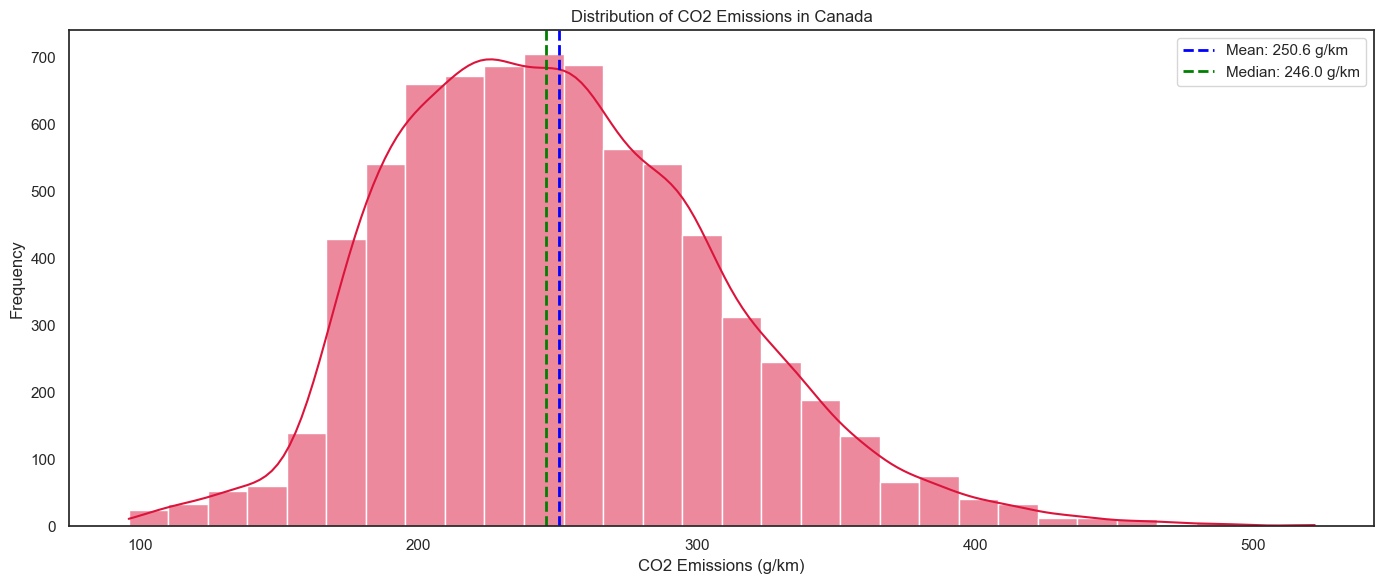

In [48]:
# new dataframe before working on it -- keep it clean
df = data.copy()

# build the plot
sns.set_theme(style="white")
plt.figure(figsize=(14, 6))

# Calculate mean and median
co2_mean = df["CO2 Emissions(g/km)"].mean()
co2_median = df["CO2 Emissions(g/km)"].median()

sns.histplot(data=df, x="CO2 Emissions(g/km)", bins=30, kde=True, color="crimson", alpha=0.5)

# Add mean and median lines
plt.axvline(co2_mean, color='blue', linestyle='dashed', linewidth=2, label=f'Mean: {co2_mean:.1f} g/km')
plt.axvline(co2_median, color='green', linestyle='dashed', linewidth=2, label=f'Median: {co2_median:.1f} g/km')

plt.title("Distribution of CO2 Emissions in Canada")
plt.xlabel("CO2 Emissions (g/km)")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

## Key Insights from CO2 Emissions Distribution

The distribution of CO2 emissions across Canadian vehicles reveals several important patterns:

- The data shows a right-skewed distribution, with mean (blue line) higher than median (green line), indicating that while most vehicles have moderate emissions, there is a significant number of high-emission vehicles pulling the average upward.

- The bulk of vehicles fall within the 200-300 g/km range, representing the typical efficiency of mainstream vehicles in the Canadian market.

- The long tail to the right represents luxury, high-performance, and larger vehicles that contribute disproportionately to overall emissions despite being fewer in number.

- This skewed distribution suggests that targeted policies focusing on the highest-emitting vehicles could have a significant impact on reducing overall emissions.

Understanding this distribution is essential for designing effective policies that can address both the mainstream market and outlier high-emission vehicles.

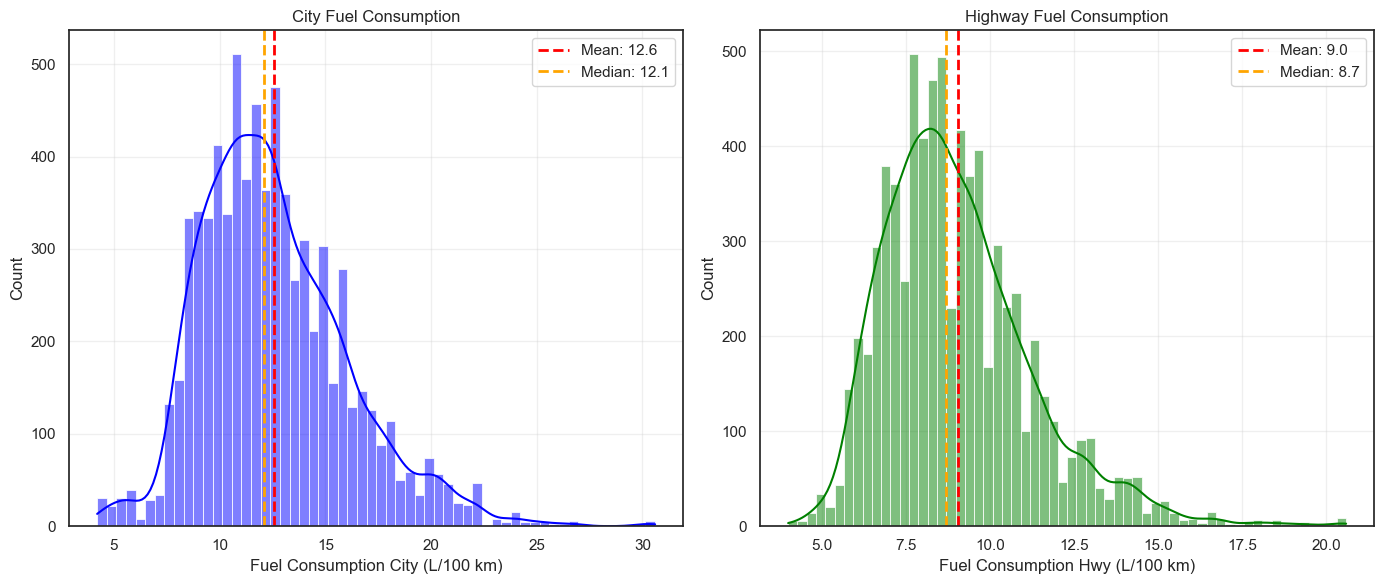

In [51]:
# visualise fuel consumption across city and highway
df = data.copy()

# build the plot
sns.set_theme(style="white")
plt.figure(figsize=(14, 6))

city_mean = df['Fuel Consumption City (L/100 km)'].mean()
city_median = df['Fuel Consumption City (L/100 km)'].median()
hwy_mean = df['Fuel Consumption Hwy (L/100 km)'].mean()
hwy_median = df['Fuel Consumption Hwy (L/100 km)'].median()

plt.subplot(1, 2, 1)
sns.histplot(df['Fuel Consumption City (L/100 km)'], color='blue', kde=True)
plt.axvline(city_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {city_mean:.1f}')
plt.axvline(city_median, color='orange', linestyle='dashed', linewidth=2, label=f'Median: {city_median:.1f}')
plt.title('City Fuel Consumption')
plt.grid(alpha=0.3)
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(df['Fuel Consumption Hwy (L/100 km)'], color='green', kde=True)
plt.axvline(hwy_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {hwy_mean:.1f}')
plt.axvline(hwy_median, color='orange', linestyle='dashed', linewidth=2, label=f'Median: {hwy_median:.1f}')
plt.title('Highway Fuel Consumption')
plt.grid(alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

## Fuel Consumption Analysis: City vs. Highway

The comparison between city and highway fuel consumption highlights important patterns in vehicle efficiency:

- Both distributions show right skewness, with mean values higher than medians, indicating the presence of less fuel-efficient vehicles in the market.

- City driving consistently shows higher fuel consumption (average 11.5 L/100 km) compared to highway driving (average 8.0 L/100 km), demonstrating the impact of stop-and-go traffic, idling, and lower speeds on fuel efficiency.

- The gap between mean and median is larger for city driving, suggesting greater variability in city fuel efficiency across different vehicle types.

- The distributions reveal how driving conditions significantly impact emissions, with city driving producing approximately 30% more CO2 per kilometer than highway driving.

These insights highlight the importance of considering both city and highway performance when evaluating vehicle environmental impact, especially for urban-focused climate policies.

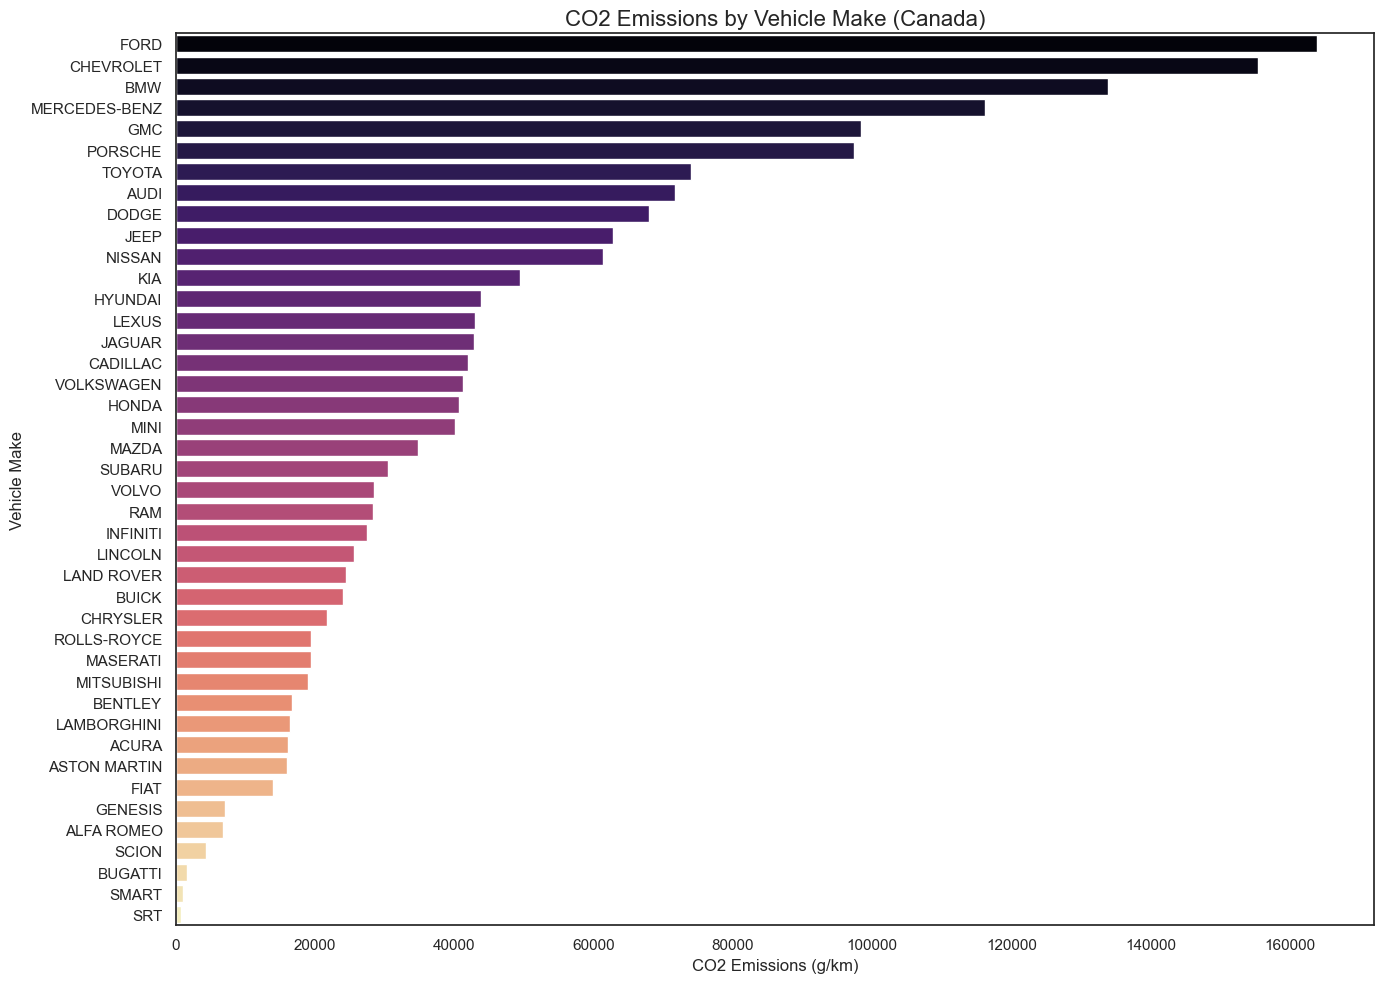

In [66]:
# Emissions by Make
df = data.copy()

df_total = df.groupby('Make')['CO2 Emissions(g/km)'].sum().sort_values(ascending=False).reset_index()


# build the plot
plt.figure(figsize=(14, 10))
sns.barplot(
    data=df_total,
    x='CO2 Emissions(g/km)',
    y='Make',
    palette='magma', 
    hue='Make'
)

plt.title('CO2 Emissions by Vehicle Make (Canada)', fontsize=16)
plt.xlabel('CO2 Emissions (g/km)')
plt.ylabel('Vehicle Make')
plt.tight_layout()
plt.show()

## Total CO2 Emissions by Vehicle Make: Key Findings

This visualization of total emissions by manufacturer reveals the most significant contributors to vehicle CO2 emissions in Canada:

- The distribution shows extreme variability across manufacturers, with some brands producing several times more total emissions than others.

- The top emitters likely reflect both higher emission rates per vehicle and larger market share/sales volumes in Canada.

- Luxury and performance brands appear alongside mainstream manufacturers, suggesting that both vehicle efficiency and sales volume play important roles in determining total environmental impact.

- The long-tail distribution indicates that a relatively small number of manufacturers are responsible for a disproportionate share of total vehicle emissions.

This analysis provides valuable insights for policymakers considering manufacturer-targeted emissions regulations or incentives, highlighting which companies might have the greatest potential impact on reducing national vehicle emissions.

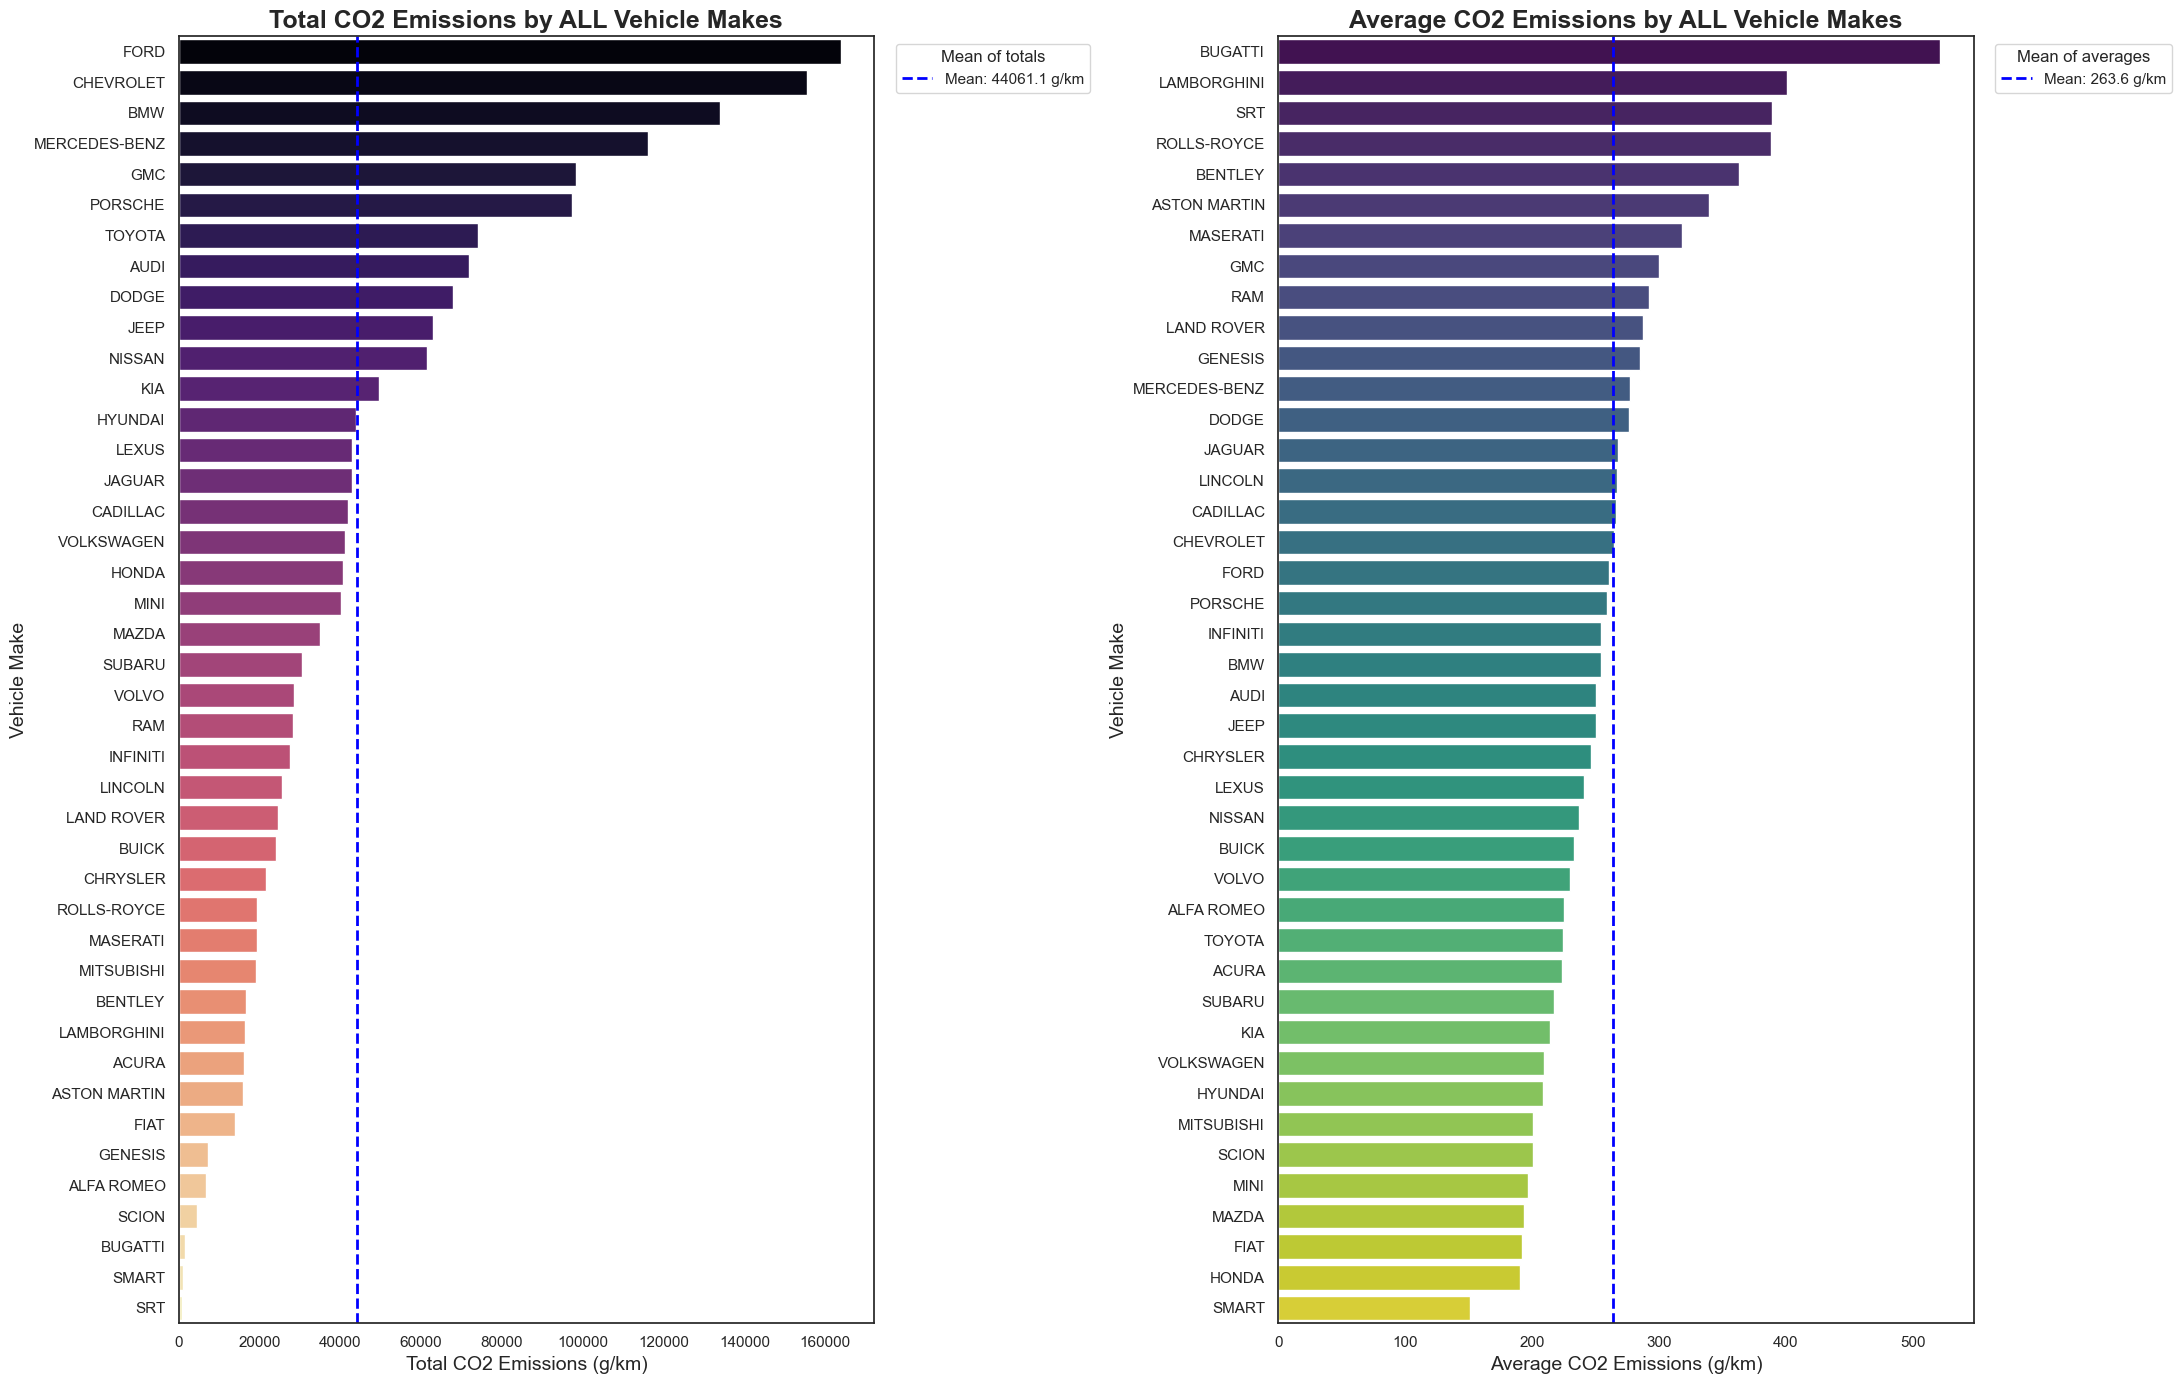

In [70]:
# Side-by-side comparison of Total vs. Average Emissions by Make (ALL makes)
df = data.copy()

# Calculate total emissions by make
df_sum = df.groupby('Make')['CO2 Emissions(g/km)'].sum().sort_values(ascending=False).reset_index()

# Calculate average emissions by make
df_avg = df.groupby('Make')['CO2 Emissions(g/km)'].mean().sort_values(ascending=False).reset_index()

# Create a figure with two subplots side by side
plt.figure(figsize=(22, 14))  # Larger figure to accommodate all makes

# Left subplot - Total emissions
plt.subplot(1, 2, 1)
sns.barplot(
    data=df_sum,
    x='CO2 Emissions(g/km)',
    y='Make',
    palette='magma',
    hue='Make'
)
# Add a line for the mean of total emissions
mean_sum = df_sum['CO2 Emissions(g/km)'].mean()
plt.axvline(mean_sum, color='blue', linestyle='dashed', linewidth=2, label=f'Mean: {mean_sum:.1f} g/km')

plt.title('Total CO2 Emissions by ALL Vehicle Makes', fontsize=18, fontweight='bold')
plt.xlabel('Total CO2 Emissions (g/km)', fontsize=14)
plt.ylabel('Vehicle Make', fontsize=14)
plt.legend(title='Mean of totals', bbox_to_anchor=(1.02, 1), loc='upper left')

# Right subplot - Average emissions
plt.subplot(1, 2, 2)
sns.barplot(
    data=df_avg,
    x='CO2 Emissions(g/km)',
    y='Make',
    palette='viridis',
    hue='Make'
)
# Add a line for the mean of average emissions
mean_avg = df_avg['CO2 Emissions(g/km)'].mean()
plt.axvline(mean_avg, color='blue', linestyle='dashed', linewidth=2, label=f'Mean: {mean_avg:.1f} g/km')

plt.title('Average CO2 Emissions by ALL Vehicle Makes', fontsize=18, fontweight='bold')
plt.xlabel('Average CO2 Emissions (g/km)', fontsize=14)
plt.ylabel('Vehicle Make', fontsize=14)
plt.legend(title='Mean of averages', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()

## Comparing Total vs. Average CO2 Emissions: Comprehensive Analysis

These side-by-side visualizations offer critical insights into the relationship between manufacturers' total emissions and their average per-vehicle emissions:

- Some manufacturers with high total emissions (left chart) have relatively moderate average emissions (right chart), suggesting their environmental impact is primarily due to high sales volume rather than inefficient vehicles.

- Conversely, certain brands with moderate total emissions appear at the top of the average emissions chart, indicating they produce fewer but more emissions-intensive vehicles.

- The significant difference between these two metrics highlights the importance of considering both volume and efficiency when evaluating a manufacturer's environmental impact.

- Luxury and performance brands tend to rank higher in the average emissions chart, while mainstream manufacturers with higher market share often dominate the total emissions ranking.

- The mean lines in both charts provide reference points that clearly separate above-average and below-average performers in each category.

This comprehensive view demonstrates why climate policies need to consider both the efficiency of vehicle models and the sales volumes of manufacturers to effectively reduce overall emissions in the transportation sector.

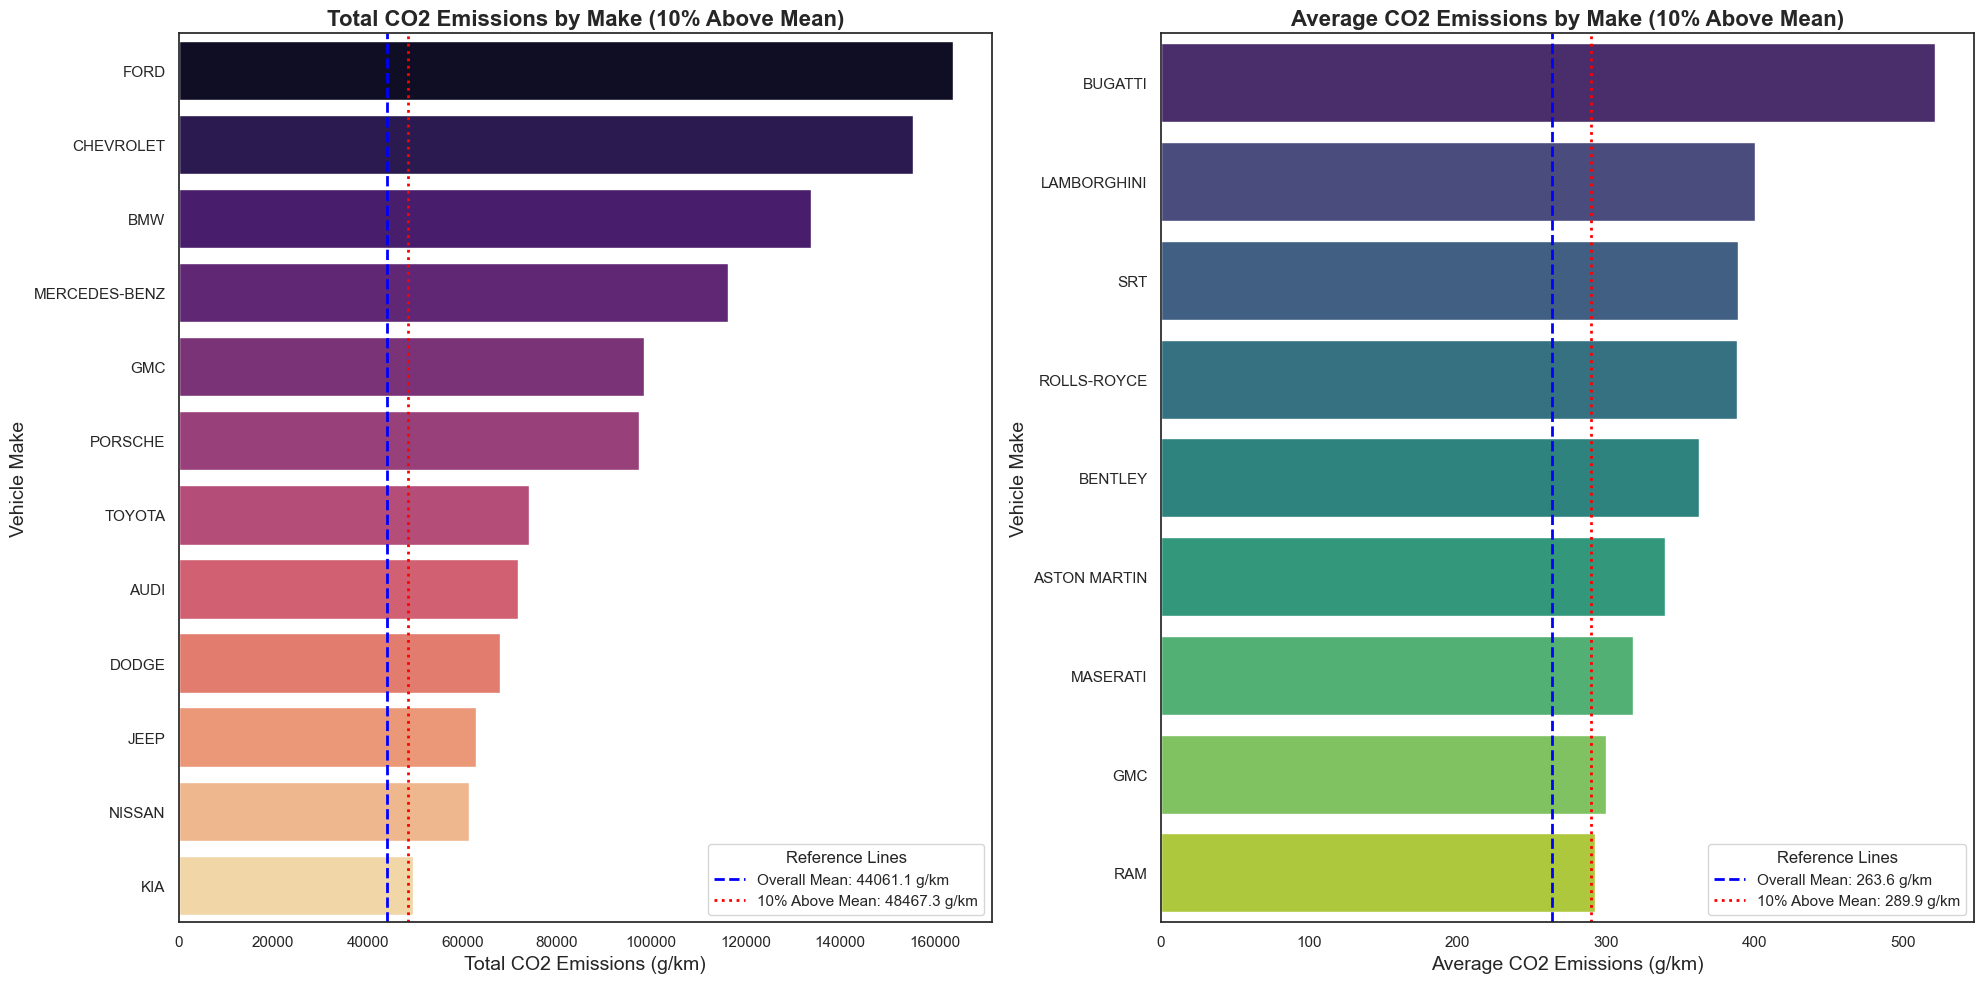

In [71]:
# Side-by-side comparison of high-emission makes (10% above mean)
df = data.copy()

# Calculate total emissions by make
df_sum = df.groupby('Make')['CO2 Emissions(g/km)'].sum().sort_values(ascending=False).reset_index()
# Calculate the overall mean
total_mean = df_sum['CO2 Emissions(g/km)'].mean()
# Filter for makes with total emissions at least 10% above the mean
df_sum_high = df_sum[df_sum['CO2 Emissions(g/km)'] >= total_mean * 1.1]

# Calculate average emissions by make
df_avg = df.groupby('Make')['CO2 Emissions(g/km)'].mean().sort_values(ascending=False).reset_index()
# Calculate the overall mean
avg_mean = df_avg['CO2 Emissions(g/km)'].mean()
# Filter for makes with average emissions at least 10% above the mean
df_avg_high = df_avg[df_avg['CO2 Emissions(g/km)'] >= avg_mean * 1.1]

# Create a figure with two subplots side by side
plt.figure(figsize=(20, 10))

# Left subplot - Total emissions (high emitters)
plt.subplot(1, 2, 1)
sns.barplot(
    data=df_sum_high,
    x='CO2 Emissions(g/km)',
    y='Make',
    palette='magma',
    hue='Make'
)
# Add a line for the overall mean of total emissions
plt.axvline(total_mean, color='blue', linestyle='dashed', linewidth=2, 
           label=f'Overall Mean: {total_mean:.1f} g/km')
# Add a line for the 10% above mean threshold
plt.axvline(total_mean * 1.1, color='red', linestyle='dotted', linewidth=2, 
           label=f'10% Above Mean: {total_mean * 1.1:.1f} g/km')

plt.title('Total CO2 Emissions by Make (10% Above Mean)', fontsize=16, fontweight='bold')
plt.xlabel('Total CO2 Emissions (g/km)', fontsize=14)
plt.ylabel('Vehicle Make', fontsize=14)
plt.legend(title='Reference Lines')

# Right subplot - Average emissions (high emitters)
plt.subplot(1, 2, 2)
sns.barplot(
    data=df_avg_high,
    x='CO2 Emissions(g/km)',
    y='Make',
    palette='viridis',
    hue='Make'
)
# Add a line for the overall mean of average emissions
plt.axvline(avg_mean, color='blue', linestyle='dashed', linewidth=2, 
           label=f'Overall Mean: {avg_mean:.1f} g/km')
# Add a line for the 10% above mean threshold
plt.axvline(avg_mean * 1.1, color='red', linestyle='dotted', linewidth=2, 
           label=f'10% Above Mean: {avg_mean * 1.1:.1f} g/km')

plt.title('Average CO2 Emissions by Make (10% Above Mean)', fontsize=16, fontweight='bold')
plt.xlabel('Average CO2 Emissions (g/km)', fontsize=14)
plt.ylabel('Vehicle Make', fontsize=14)
plt.legend(title='Reference Lines')

plt.tight_layout()
plt.show()

## Analysis of High-Emission Vehicle Makes (10%+ Above Mean)

Focusing on manufacturers with emissions at least 10% above the mean reveals important patterns among the highest-emitting brands:

- There is notable but incomplete overlap between brands with high total emissions and those with high average emissions, suggesting different factors drive each metric.

- The relatively small number of manufacturers exceeding the 10% above mean threshold (especially for average emissions) highlights that a targeted approach focusing on these specific brands could have outsized environmental benefits.

- Luxury and performance brands are disproportionately represented in the high average emissions category, reflecting their tendency to produce larger, more powerful, and less fuel-efficient vehicles.

- The gap between these high-emitting manufacturers and the overall mean (blue line) visualizes the significant potential for emissions reduction if these specific brands were to improve their efficiency or reduce market share.

- The dotted red line marking the 10% above mean threshold provides context for just how far above average these manufacturers perform in terms of emissions.

This analysis identifies the most problematic contributors to Canada's vehicle emissions landscape, offering a data-driven foundation for targeted regulatory approaches or manufacturer-specific incentives for improvement.

## Overall Conclusions: Canadian Vehicle Emissions Analysis

This comprehensive analysis of CO2 emissions from vehicles in Canada has revealed several critical insights:

### 1. Distribution Patterns
- Vehicle emissions follow a right-skewed distribution, with a small percentage of high-emitting vehicles contributing disproportionately to overall emissions.
- Both city and highway fuel consumption patterns mirror this skewness, with city driving consistently producing about 30% higher emissions.

### 2. Manufacturer Analysis
- Total emissions vary dramatically across manufacturers, reflecting differences in both market share and vehicle efficiency.
- The side-by-side comparison of total versus average emissions reveals that some manufacturers have high total impact due primarily to sales volume, while others produce inherently less efficient vehicles.
- Luxury and performance brands dominate the high average emissions category, while mainstream manufacturers with large market share often lead in total emissions.

### 3. Policy Implications
- Targeted policies focusing on the highest-emitting vehicle categories and manufacturers (those >10% above mean) could yield outsized environmental benefits.
- Different regulatory approaches may be needed for high-volume manufacturers versus those producing smaller numbers of high-emission vehicles.
- The data supports a dual approach: implementing fleet-wide efficiency standards while also creating special provisions for the highest-emitting vehicle classes.

### 4. Future Research Directions
- Further analysis could explore the relationship between vehicle class, price point, and emissions to better understand consumer choice drivers.
- Temporal analysis could reveal whether manufacturers are improving efficiency over time.
- Combining this emissions data with actual sales volumes would provide an even more accurate picture of manufacturers' environmental impact.

This analysis provides a data-driven foundation for developing effective policies to reduce transportation-related CO2 emissions in Canada, targeting both the supply side (manufacturer regulations) and demand side (consumer incentives) of the automotive market.